# Machine Failure Prediction #

>### Date :  23 Jan 24 ###

## Sequence ##
1. Problem identification
2. Data preparation/ Features handling
3. Model Selection
4. Evaluation
5. Fiting/ evaluation
6. Experimentation
7. deploy

### 1. The Give Dataset is Machine Failure Prediction Problem.  ###

It is a Classification Problem. 

Binary class prediction i.e 0 or 1 
* 0 - Machine is Operational.
* 1 - Machine has Failed

Machine failure i.e 1 or not failed i.e 0, needs to be  predicted based on pattern available in data

### 2. Data processing ####

In [82]:
import pandas as pd
df = pd.read_csv("machine_failure_final.csv")
df.head()

,Machine Tyoe,Air te1perature [K],Process temperature [K],Rotational speed [rp1],Torque [N1],Tool wear [1in],Machine Failure
0,0,297.9,309.8,1336,71.6,31.0,1
1,0,298.9,309.0,1410,65.7,191.0,1
2,1,298.1,308.2,1420,63.9,19.0,1
3,0,298.1,308.3,1331,63.0,13.0,1
4,0,298.4,308.3,1433,62.3,20.0,1


In [2]:
df.value_counts()

Machine Tyoe  Air te1perature [K]  Process temperature [K]  Rotational speed [rp1]  Torque [N1]  Tool wear [1in]  Machine Failure
0             296.1                307.1                    1898                    22.7         20.0             0                  1
              298.8                309.1                    1362                    45.4         113.0            0                  1
                                                            1378                    54.4         165.0            0                  1
                                                            1393                    52.6         167.0            0                  1
                                                            1418                    46.3         133.0            0                  1
                                                                                                                                    ..
              297.6                309.5                    

The dataframe has 856 x 7 entries.

#### Ploting the data for better visualization ####

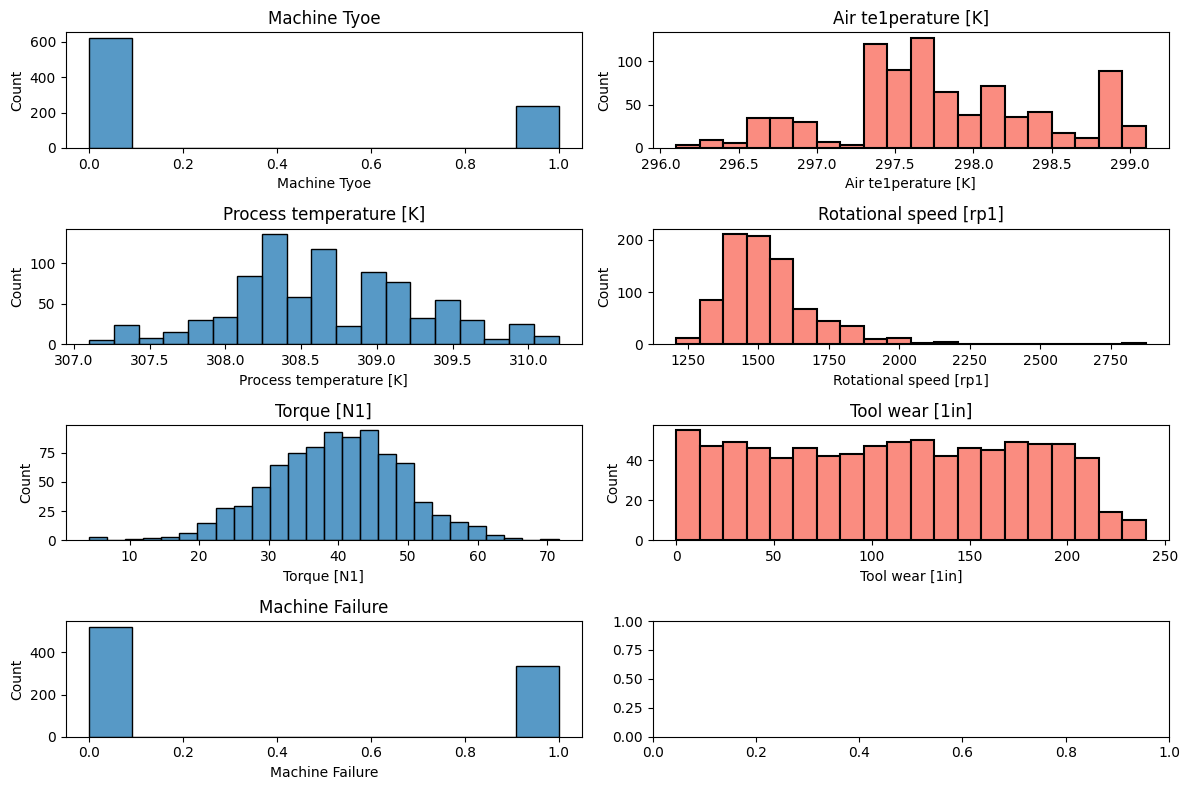

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'Price' is a column in df
fig, axs = plt.subplots(4, 2, figsize=(12, 8))  # 2 rows, 2 columns

# Plot the first subplot
sns.histplot(df['Machine Tyoe'], kde=False, ax=axs[0, 0])
axs[0, 0].set_title("Machine Tyoe")

# Plot the second subplot
sns.histplot(df['Air te1perature [K]'], kde=False, ax=axs[0, 1], bins=20, color='salmon', edgecolor='black', linewidth=1.5, alpha=0.9)
axs[0, 1].set_title("Air te1perature [K]")

# Plot the third subplot
sns.histplot(df['Process temperature [K]'], kde=False, ax=axs[1, 0])
axs[1, 0].set_title("Process temperature [K]")

# Plot the fourth subplot
sns.histplot(df['Rotational speed [rp1]'], kde=False, ax=axs[1, 1], bins=20, color='salmon', edgecolor='black', linewidth=1.5, alpha=0.9)
axs[1, 1].set_title("Rotational speed [rp1]")

# Plot the third subplot
sns.histplot(df['Torque [N1]'], kde=False, ax=axs[2, 0])
axs[2, 0].set_title("Torque [N1]")

# Plot the fourth subplot
sns.histplot(df['Tool wear [1in]'], kde=False, ax=axs[2, 1], bins=20, color='salmon', edgecolor='black', linewidth=1.5, alpha=0.9)
axs[2, 1].set_title("Tool wear [1in]")

# Plot the third subplot
sns.histplot(df['Machine Failure'], kde=False, ax=axs[3, 0])
axs[3, 0].set_title("Machine Failure")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


We can analyze the given data from plots:
1. Machine types. There are two machines types, lathe and milling machines. Lathe machine (621) and milling are 237 in number.
2. Air temperature ranges its peak around 297K to 299K
3. Process Temperature ranges its peak from 308 to 309K
4. Rotational speed is having its peak around 1500 rpm
5. Torque has its standard deviation arround 30 - 50N
6. Tool wear has a contant wear pattern and do not exhibit the guassian distribution.   

#### Encoding ####
All numeric data so no need of encoding

In [3]:
df.dtypes

Machine Tyoe                 int64
Air te1perature [K]        float64
Process temperature [K]    float64
Rotational speed [rp1]       int64
Torque [N1]                float64
Tool wear [1in]            float64
Machine Failure              int64
dtype: object

#### Imputation ####
There are two missing entries which needs to be addressed before processing

* 1 x Air te1perature [K]
* 1 x Tool wear [1in]

In [83]:
df.isna().sum()

Machine Tyoe               0
Air te1perature [K]        1
Process temperature [K]    0
Rotational speed [rp1]     0
Torque [N1]                0
Tool wear [1in]            1
Machine Failure            0
dtype: int64

<Axes: >

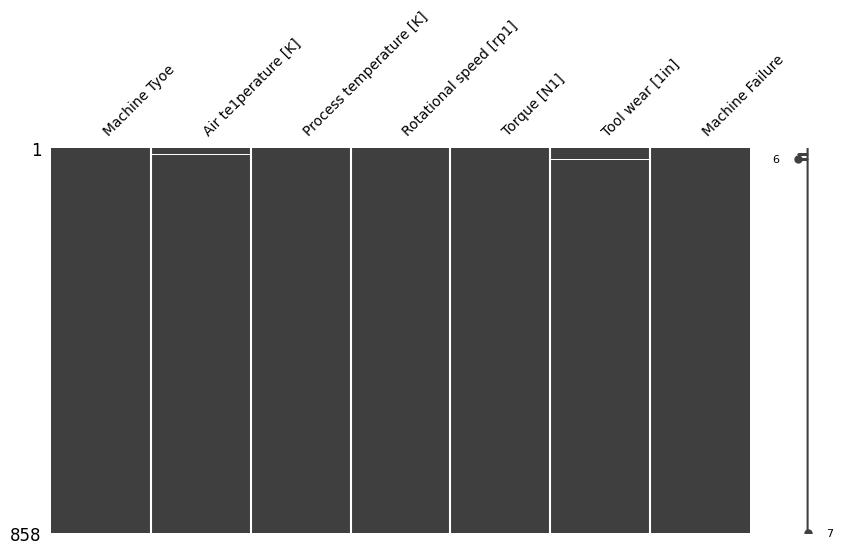

In [87]:
import missingno
#plot missing number matirx representation
missingno.matrix(df,figsize=[10, 5], fontsize=10)
#missingno.matrix(test_set,figsize=[4, 4], fontsize=5)

* Missingno plot indicating there are 2 x entries missing, as indicated from white line.
* We replace the missing entries with mean of the column. 

In [6]:
df["Air te1perature [K]"].fillna(value=df["Air te1perature [K]"].mean(), inplace=True)

In [7]:
df["Tool wear [1in]"].fillna(value=df["Tool wear [1in]"].mean(), inplace=True)

In [8]:
df.isna().sum()

Machine Tyoe               0
Air te1perature [K]        0
Process temperature [K]    0
Rotational speed [rp1]     0
Torque [N1]                0
Tool wear [1in]            0
Machine Failure            0
dtype: int64

Since this the the classiification problem, hence we need not to convert it into test/ train split and then carryout the imputation.

otherwise had it been a Regression problem, to avoid the data leakage we need to split the data first and then imputate to avoid data leakage.

Now our data is clean

All numeric and no missing entries

In [9]:
df.dtypes

Machine Tyoe                 int64
Air te1perature [K]        float64
Process temperature [K]    float64
Rotational speed [rp1]       int64
Torque [N1]                float64
Tool wear [1in]            float64
Machine Failure              int64
dtype: object

In [10]:
df.isna().sum()

Machine Tyoe               0
Air te1perature [K]        0
Process temperature [K]    0
Rotational speed [rp1]     0
Torque [N1]                0
Tool wear [1in]            0
Machine Failure            0
dtype: int64

In [80]:
df["Machine Tyoe"].value_counts()

0    621
1    237
Name: Machine Tyoe, dtype: int64

In [12]:
df["Machine Failure"].value_counts()

0    523
1    335
Name: Machine Failure, dtype: int64

It is a slightly imbalance dataset

*  0  -  523 extries are of successful machine performace

*  1  -  335 entries are of failure

so precision and recall will be important parameters in evaluation metircs, we will look into later

# 3. Model Selection - based on data #

In [14]:
len(df)

858

* So there are 858 samples available.

*  Classification problem.

*  Hence using the estimator using scikit learn documentation, we will choose our baseline model as LInear SVC since samples are <100k

#### 3.1 Model - 1 : Linear SVC ####

In [15]:
X = df.drop('Machine Failure', axis=1)
X

,Machine Tyoe,Air te1perature [K],Process temperature [K],Rotational speed [rp1],Torque [N1],Tool wear [1in]
0,0,297.9,309.8,1336,71.6,31.0
1,0,298.9,309.0,1410,65.7,191.0
2,1,298.1,308.2,1420,63.9,19.0
3,0,298.1,308.3,1331,63.0,13.0
4,0,298.4,308.3,1433,62.3,20.0
...,...,...,...,...,...,...
853,0,297.5,308.3,2564,12.8,127.0
854,1,298.2,308.5,2678,10.7,86.0
855,0,296.4,307.4,2833,5.6,213.0
856,0,298.9,309.1,2861,4.6,143.0


In [16]:
y = df['Machine Failure']
y

0      1
1      1
2      1
3      1
4      1
      ..
853    1
854    1
855    1
856    1
857    1
Name: Machine Failure, Length: 858, dtype: int64

In [17]:
# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3) # you can change the test size

# Create validation and test split by spliting testing data in half (30% test -> 15% validation, 15% test)
#X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

# Check the shapes of different data splits
X_train.shape, y_train.shape, X_test.shape, y_test.shape, #X_valid.shape, y_valid.shape

((600, 6), (600,), (258, 6), (258,))

In [18]:
import numpy as np
import sklearn

In [30]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf_1 = make_pipeline(StandardScaler(),
                    LinearSVC(dual="auto", random_state=0, tol=1e-5))

# Fitting and evaluting the baseline model
clf_1.fit(X_train, y_train)
clf_1.score(X_test, y_test)

0.8527131782945736

* Our baseline model has given quite good accuracy
* Now we need to improve the results using few other models
* Thereafter will go for hyperparameter tunning

#### 3.2 Model - 2 : NuSVC ####

In [31]:
from sklearn.svm import NuSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf_2 = make_pipeline(StandardScaler(), NuSVC())


# Fitting and evaluting the baseline model
clf_2.fit(X_train, y_train)
clf_2.score(X_test, y_test)

0.8837209302325582

* Our results have increased
* The score command by defualt giving the accuracy of the model
* It shows the total correct prediction percentage out of total samples
* Try another model

#### 3.3 Model - 3 : SVC ####

In [32]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
clf_3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# Make sure to use the transformed data (filled and one-hot encoded X data)
clf_3.fit(X_train, y_train)
clf_3.score(X_test, y_test)

0.9457364341085271

* Model accuracy has increasd considerably
* Mov towards more complicated model selection
* lets trg few other models

#### 3.4 Model - 4 : Knearest Neighbours ####

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf_4 = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

clf_4.fit (X_train, y_train)
clf_4.score(X_test, y_test)

0.8837209302325582

#### 3.5 Model - 5 : RandomForestClassifier ####

In [34]:
from sklearn.ensemble import RandomForestClassifier
clf_5 = RandomForestClassifier(n_estimators=100)

# Make sure to use the transformed data (filled and one-hot encoded X data)
clf_5.fit(X_train, y_train)
clf_5.score(X_test, y_test)

0.9767441860465116

* great
* Our baseline model has given good prediction
* Move forward to evaluate. No wait

#### Which Model to be selected? ####

* We selected 5 x Models
* The accuracy ranges from 85% to 97%
* to be realistic so that our model be a **generalized** model, we will keep the model which gives accuracy arroud 90 - 95%
* So we select SVC as our final model (clf_3)

# 4. Evaluation #

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

In [41]:
y_preds = clf_3.predict(X_test)

In [42]:
def evaluate_preds(y_true: np.array, 
                   y_preds: np.array) -> dict:
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.

    Returns several metrics in the form of a dictionary.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [43]:
evaluate_preds(y_test, y_preds)

Acc: 94.57%
Precision: 0.95
Recall: 0.91
F1 score: 0.93


{'accuracy': 0.95, 'precision': 0.95, 'recall': 0.91, 'f1': 0.93}

*  Accuracy is the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances. In our case, the model is accurate in its predictions for approximately 94.57% of the cases.

*  Precision is the ratio of true positive predictions to the total predicted positives. In our scenario, when the model predicts a positive class, it is correct about 95% of the time. It reflects the accuracy of the positive predictions. 

*  Recall, also known as sensitivity or true positive rate, is the ratio of true positive predictions to the total actual positives. In our case, the model captures about 91% of all actual positive instances. It measures the model's ability to identify all relevant cases.

*  F1 score gives a combination of Precision and Recall. The F1 score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance, especially when precision and recall have an uneven trade-off. In our case, the F1 score is 0.93, indicating a good balance between precision and recall.

#### 4.1 ROC ####

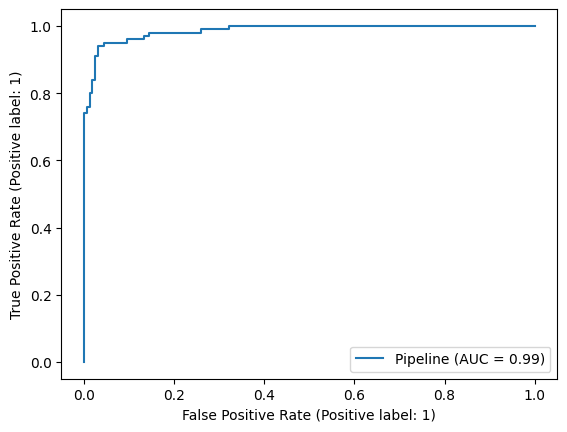

In [45]:
from sklearn.metrics import RocCurveDisplay
roc_curve_display = RocCurveDisplay.from_estimator(estimator=clf_3, 
                                                   X=X_test, 
                                                   y=y_test)

In a Receiver Operating Characteristic (ROC) curve, the Area Under the Curve (AUC) is a metric that quantifies the model's ability to distinguish between positive and negative classes. 

The AUC value ranges from 0 to 1.

Generally, AUC = 0.5 indicates a model that performs no better than random chances.

AUC > 0.5 suggests a better-than-random model, with higher values indicating better perforance

In our case, where AUC = 0.99, it indicate that our model has a reasonably good ability to discriminate between the positive and negative class. task.

#### 4.2 Confusion Matrics ####

In [46]:
from sklearn.metrics import confusion_matrix

y_preds = clf_3.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[153,   5],
       [  9,  91]], dtype=int64)

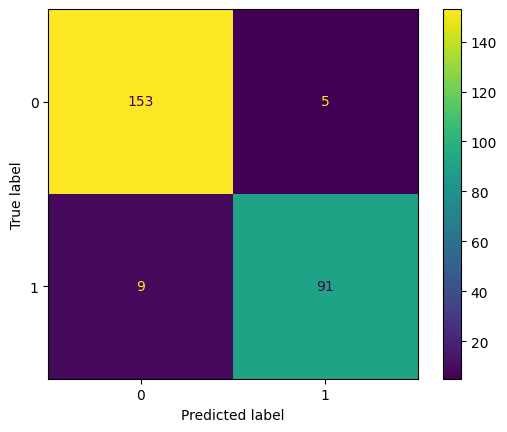

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

True Positive (TP): 153  (Machine operational and predicted as operational)

True Negative (TN): 91   (Machine Failed and predicted as Failed)

False Positive (FP): 9   (Machine Failed but predicted as operational)

False Negative (FN): 5   (Machine operational but predicted as Failed)

So, in more detail:

True Positive (TP): The model correctly predicted 153 instances Machine as operational.

True Negative (TN): The model correctly predicted 91 instances as Machine failure.

False Positive (FP): The model incorrectly predicted 9 instances as operational when they were actually failed.

False Negative (FN): The model incorrectly predicted 5 instances as machine failure when they were actually operational.

#### 4.3 Classification Report ####

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       158
           1       0.95      0.91      0.93       100

    accuracy                           0.95       258
   macro avg       0.95      0.94      0.94       258
weighted avg       0.95      0.95      0.95       258



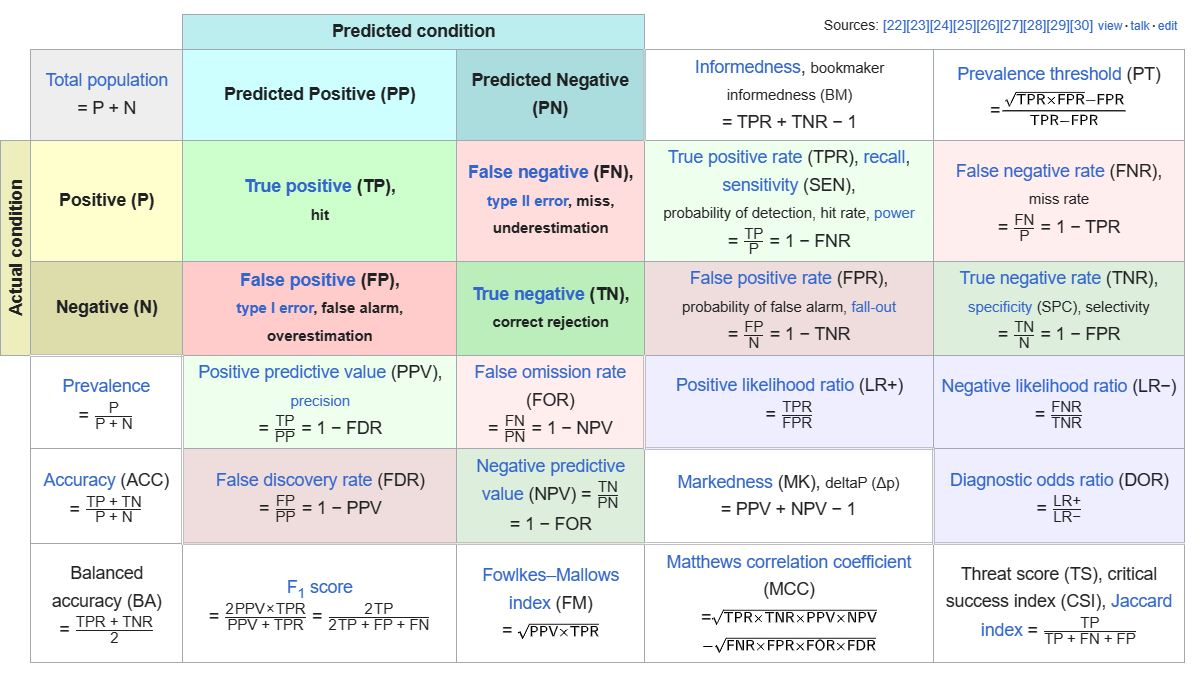

Since there is a class imbalance to some extent so between 0 and 1 entries, hence the values of Precision and Recall is more important as compared to accuracy.

since FP are more worst then FN, we should aim towards improving the recall value.

#### 4.3 Scoring Parameter - cross_val_score ####

In [49]:
from sklearn.model_selection import cross_val_score
import numpy as np
np.random.seed(42)
cv_acc = cross_val_score(clf_3, X, y, cv=5)  # default is accuracy
cv_acc

array([0.88953488, 0.9127907 , 0.93604651, 0.95906433, 0.81871345])

In [50]:
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 90.32%


In [51]:
cv_acc = cross_val_score(clf_3, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 90.32%


In [52]:
np.random.seed(42)
cv_precision = cross_val_score(clf_3, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision)*100:.2f}%")

The cross-validated precision is: 91.91%


In [53]:
np.random.seed(42)
cv_recall = cross_val_score(clf_3, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall)*100:.2f}%")

The cross-validated recall is: 82.39%


In [54]:
np.random.seed(42)
cv_f1 = cross_val_score(clf_3, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1)*100:.2f}%")

The cross-validated F1 score is: 86.81%


> the cross val scores are more generalized and considered better represetation of the model evaluation as compared on only one split data set
> It is the generalized representation of the complete model

# 5. Experimentation #

## Hyperparameter tunning ##

>Paterns in data are also refered as paramters which our model automatically finds.
>Hyperparameters are the model setting which we tune ourself to get best performance.
>Since we have selected the SVC model, we hypertune our model to improve the predictions

#### 5.1 Baseline Model ####

In [55]:
clf_3.fit(X_train, y_train)

# Make predictions
y_preds = clf_3.predict(X_test)

# Evaluate the classifier
baseline_metrics = evaluate_preds(y_test, y_preds)
baseline_metrics

Acc: 94.57%
Precision: 0.95
Recall: 0.91
F1 score: 0.93


{'accuracy': 0.95, 'precision': 0.95, 'recall': 0.91, 'f1': 0.93}

#### 5.2 RandomizedSearchCV ####

In [56]:
clf_3.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()), ('svc', SVC(gamma='auto'))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'svc': SVC(gamma='auto'),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'auto',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': None,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [57]:
param_distributions = {"svc__gamma": ["auto", "scale"],
                       "svc__kernel": ["linear", "poly", "rbf", "sigmoid"],
                       "svc__degree": [2, 3, 4, 5],
                       "svc__decision_function_shape": ["ovo", "ovr"],
                       "svc__tol": [0.01, 0.001, 0.0001]
                       }

In [58]:
# Count the total number of hyperparameter combinations to test
total_randomized_hyperparameter_combintions_to_test = np.prod([len(value) for value in param_distributions.values()])
print(f"There are {total_randomized_hyperparameter_combintions_to_test} potential combinations of hyperparameters to test.")

There are 192 potential combinations of hyperparameters to test.


In [59]:
# Start the timer
import time
start_time = time.time()

from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

np.random.seed(42)
# Setup RandomizedSearchCV 
n_iter = 20 # try 30 models total
rs_clf = RandomizedSearchCV(estimator=clf_3,
                            param_distributions=param_distributions,
                            n_iter=n_iter, 
                            cv=5, # 5-fold cross-validation
                            verbose=1) # print out results

# Fit the RandomizedSearchCV version of clf (does cross-validation for us, so no need to use a validation set)
rs_clf.fit(X_train, y_train)

# Finish the timer
end_time = time.time()
print(f"[INFO] Total time taken for {n_iter} random combinations of hyperparameters: {end_time - start_time:.2f} seconds.")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[INFO] Total time taken for 20 random combinations of hyperparameters: 1.95 seconds.


In [60]:
# Find the best hyperparameters found by RandomizedSearchCV
rs_clf.best_params_

{'svc__tol': 0.0001,
 'svc__kernel': 'rbf',
 'svc__gamma': 'scale',
 'svc__degree': 4,
 'svc__decision_function_shape': 'ovo'}

In [61]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 93.02%
Precision: 0.91
Recall: 0.88
F1 score: 0.89


#### Great ####
* Our accuracy score withouot cross val was = **94%**
* with cross_val = **90%**
* and now with Randomized Search (using cv=5) we achieved accuracy of **93%**
* So our model accuracy has increased alongwith Precision, Recall and F1 score 

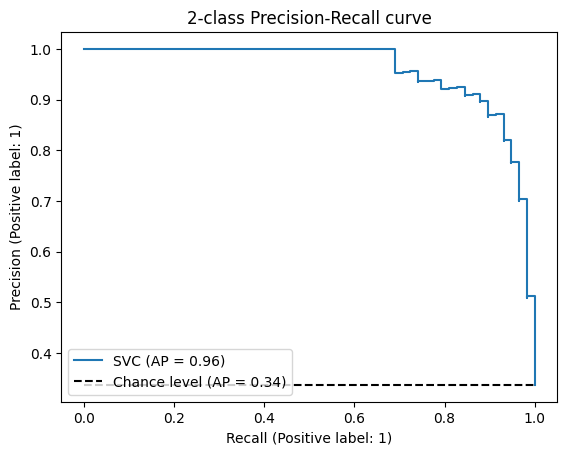

In [63]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf_3, X_test, y_test, name="SVC", plot_chance_level=True)
_= display.ax_.set_title("2-class Precision-Recall curve")

The precision-recall curve is useful when the cost of false positives and false negatives is different.
The curve is important to represent the perfornace of our classifier, which is otherwise showing good performace plot (more towards value 1 or 100%)

#### 5.3 GridSearchCV ####

In [69]:
param_grid = {"svc__tol": [0.0001, 0.00008, 0.00009, 0.00011],
              "svc__kernel": ['rbf'],
              "svc__gamma": ['scale'],
              "svc__degree": [2,4,5,3],
              "svc__decision_function_shape": ['ovo']
             }

In [70]:
# Count the total number of hyperparameter combinations to test
total_grid_search_hyperparameter_combinations_to_test = np.prod([len(value) for value in param_grid.values()])
print(f"There are {total_grid_search_hyperparameter_combinations_to_test} combinations of hyperparameters to test.")
print(f"This is {total_randomized_hyperparameter_combintions_to_test/total_grid_search_hyperparameter_combinations_to_test} times less\
 than before (previous: {total_randomized_hyperparameter_combintions_to_test}).")

There are 16 combinations of hyperparameters to test.
This is 12.0 times less than before (previous: 192).


In [71]:
# Start the timer
import time
start_time = time.time()

from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf_3,
                      param_grid=param_grid,
                      cv=5, # 5-fold cross-validation
                      verbose=1) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

# Find the running time
end_time = time.time()

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [72]:
# Check the best hyperparameters found with GridSearchCV
gs_clf.best_params_

{'svc__decision_function_shape': 'ovo',
 'svc__degree': 2,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__tol': 0.0001}

In [73]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

Acc: 93.02%
Precision: 0.91
Recall: 0.88
F1 score: 0.89


{'accuracy': 0.93, 'precision': 0.91, 'recall': 0.88, 'f1': 0.89}

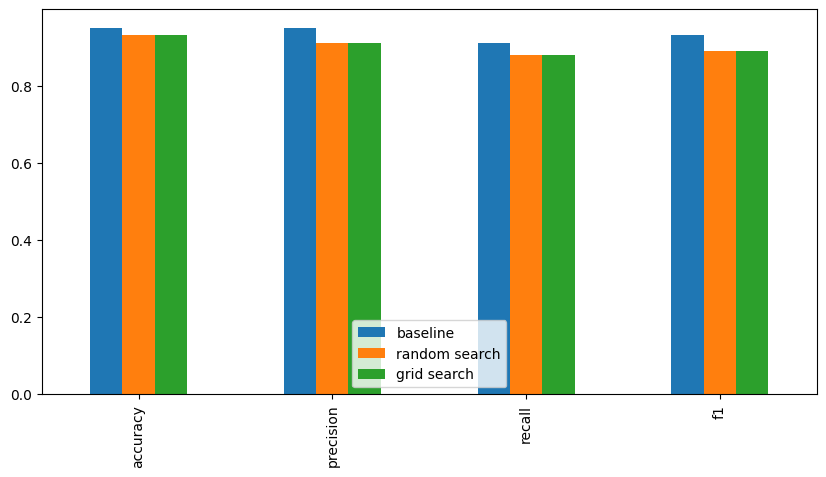

In [74]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 5));

* It concludes our **Hyperparameter search**
* The basline model performance is on the higher sider because it is not evaluated using cross validation.
* Whereas both the randomsearch and GridSearch uses the Cross Val and hence giving a more generalized performace of the model 

# 6. Deployment #

In [78]:
from joblib import dump, load

# Save a model to file
Machine_Failure_Joblib = "gs_SVC_Faheem.joblib"
dump(gs_clf, filename=Machine_Failure_Joblib) 

['gs_SVC_Faheem.joblib']